# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Dwi Sandi Kalla
- **Email:** dwisandikalla189@gmail.com
- **ID Dicoding:** MC229D5Y0803

## Menentukan Pertanyaan Bisnis

Berikut beberapa pertanyaan bisnis:
1. Bagaimana tren total penyewaan sepeda dari waktu ke waktu (dalam satuan mingguan)?
2. Bagaimana jumlah penyewa (_casual_, _registered_, dan _cnt_ pada setiap kondisicuaca yang ada?
3. Pada musim apa yang memiliki jumlah total(_cnt_) penyewaan tertinggi dan terendah?
4. Bagaimana bentuk klasterisasi yang dihasilkan ketika data dikelompokkan berdasarkan workingday, temp, dan cnt? Bagaimana total penyewa(cnt) setiap klasternya?

## Library yang digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
#Data dalam hari
days_df = pd.read_csv('https://raw.githubusercontent.com/dwisandikalla/project_data_analysis/refs/heads/main/Data/day.csv')
display(days_df)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


**Insight (Dataset days_df):**
* Data terdiri dari 731 baris dan 16 kolom.
* Data berada pada rentan waktu dari 1 januari 2011 sampai 31 Desember 2012.
* Kolom _season_ menunjukan adanya variasi musiman pada data (1:_springer_, 2:_summer_, 3:_fall_, 4:_winter_)
* Kolom _weathersit_ menunjukan kondisi cuaca yang terekam.(1 : _Clear_,2 : _Mist/Fog_, 3 : _Light Rain/Light Stroms_, 4 : _Heavy Rain/Snow_)

### Assessing Data

Melakukan assessing data pada daya days_df

In [3]:
days_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [4]:
display(days_df.isna().sum())
print()
print('jumlah duplikat : ', days_df.duplicated().sum())
print()
display(days_df.describe())

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0



jumlah duplikat :  0



,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight**:
* Tidak ada _missing value_ untuk dataset.
* Tidak terjadi duplikasi pada dataset.
* Pada kolom dteday di dataset type data yang seharusnya adalah DateTime, untuk itu type data kolom ini akan diubah.

### Cleaning Data

Melakukan cleaning data untuk data days_df

In [5]:
#Mengganti semua baris pada kolom dteday menjadi type data DateTime
datetime_columns = ["dteday"]
for columns in datetime_columns:
  days_df[columns] = pd.to_datetime(days_df[columns])

In [6]:
#Cek apakah Tipe data telah terganti
days_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight**
Kode tersebut telah behasil mengubah tipe data pada kolom dteday menjadi datetime, yang menungkinkan untuk analisis berdasarkan waktu.

## Exploratory Data Analysis (EDA)

### Explor Data

In [7]:
days_df.describe()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [8]:
#Mengubah frekuensi data days_df menjadi perminggu untuk mengetahui total penyewa sepeda
weekly_df = days_df.resample(rule='W', on='dteday').agg({
    'cnt' : 'sum'
})
weekly_df = weekly_df.reset_index()
display(weekly_df)

,dteday,cnt
0,2011-01-02,1786
1,2011-01-09,9408
2,2011-01-16,9025
3,2011-01-23,8770
4,2011-01-30,7699
...,...,...
101,2012-12-09,37762
102,2012-12-16,35966
103,2012-12-23,26696
104,2012-12-30,10720


In [9]:
#Pengelompokkan cuaca
"""1 = Clear
2 : Mist/Fog
3 : Light Rain/Light Stroms
4 : Heavy Rain/Snow"""
#Membuat jumlah total penyewa sepeda casual, register, dan cnt berdasarkan pengelompokkan cuaca diatas
days_df["weathersit_group"] = days_df["weathersit"].apply(lambda x: "Clear" if x == 1 else ("Mist/Fog" if x == 2 else ("Light Rain/Light Stroms" if x == 3 else "Heavy Rain/Snow")))
result = days_df.groupby(by="weathersit_group").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
}).reindex(["Clear", "Mist/Fog", "Light Rain/Light Stroms", "Heavy Rain/Snow"]).fillna(0)
display(result)

,casual,registered,cnt
weathersit_group,,,
Clear,446346.0,1811606.0,2257952.0
Mist/Fog,169776.0,827082.0,996858.0
Light Rain/Light Stroms,3895.0,33974.0,37869.0
Heavy Rain/Snow,0.0,0.0,0.0


In [10]:
"""Pengelompokkan musim : 1:springer, 2:summer, 3:fall, 4:winter"""
#Membuat pivot untuk pengelompokkan kolom total penyewa berdasarkan kategori musim diatas
days_df['season_group'] = days_df['season'].apply(lambda x: 'springer' if x == 1 else ('summer' if x == 2 else ('fall' if x == 3 else 'winter')))
days_df.groupby(by="season_group").agg({
     "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

,casual,registered,cnt
season_group,,,
fall,226091,835038,1061129
springer,60622,410726,471348
summer,203522,715067,918589
winter,129782,711831,841613


**Insight**
* pada pengelompokkan berdasarkan minggu, terdapat fluktuasi yang signifikan pada nilai sum cnt tiap minggunya.
* Pada pengelompokkan berdasarkan cuaca, penggunaan atau penyewaan paling tinggi disaat cuaca clear/cerah.
* Pada pengelompokkan berdasarkan musim, penyewaan sepeda tertinggi terjadi pada saat musim gugur.
* Tahapan klaterisasi menghasilkan bahwa ketika workingday, suhu sedang, dan tingkat penyewaan sedang mendapati jumlah pengguna 1863938 dengan jumlah hari yaitu 338 hari.

## Visualization & Explanatory Analysis

### Pertanyaan 1 : Bagaimana tren total penyewaan sepeda dari waktu ke waktu (dalam satuan mingguan)?

Bagaimana tren total penyewaan sepeda dari waktu ke waktu (dalam satuan mingguan)?

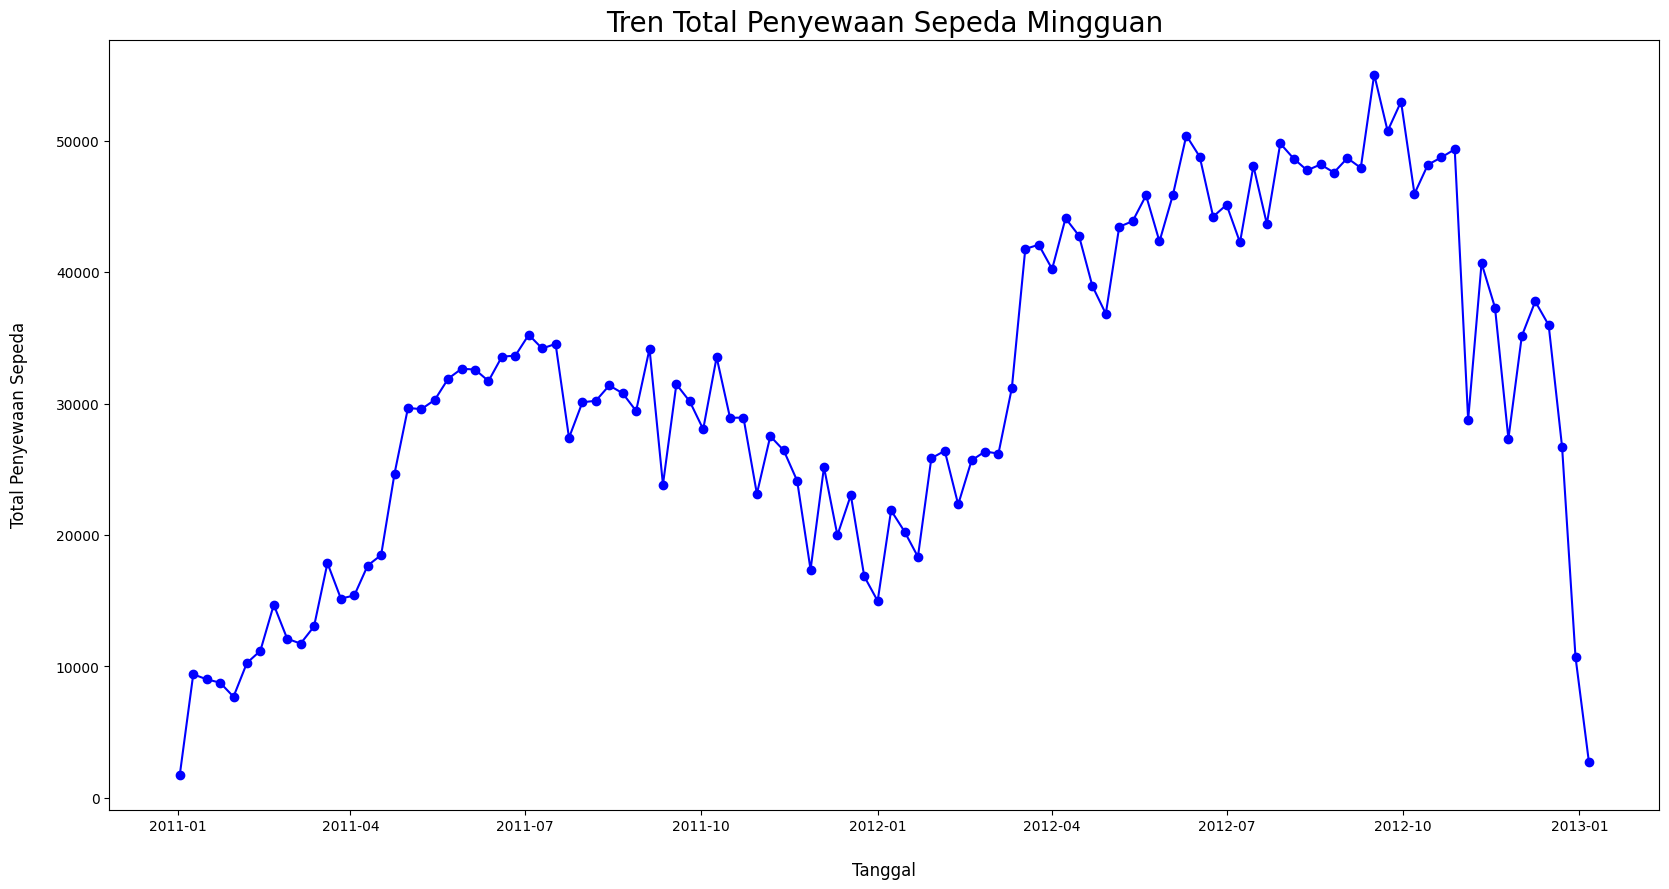

In [11]:
#Membuat visualisasi data untuk tren mingguan dengan kode di exploratory data
plt.figure(figsize=(20,10))
plt.plot(weekly_df['dteday'], weekly_df['cnt'], marker='o', color='blue')
plt.title('Tren Total Penyewaan Sepeda Mingguan',loc='center', fontsize=20)
plt.xlabel('Tanggal', labelpad=20, fontsize=12)
plt.ylabel('Total Penyewaan Sepeda', labelpad=20, fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

### Pertanyaan 2: Bagaimana jumlah penyewa (_casual_, _registered_, dan _cnt_ pada setiap kondisicuaca yang ada?

Bagaimana jumlah penyewa (_casual_, _registered_, dan _cnt_ pada setiap kondisicuaca yang ada?

<ipython-input-12-4068e19a14f9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=result.index, y=result['casual'], ax=ax[0], palette=colors)
<ipython-input-12-4068e19a14f9>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=result.index, y=result['registered'], ax=ax[1], palette=colors)
<ipython-input-12-4068e19a14f9>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=result.index, y=result['cnt'], ax=ax[2], palette=colors)


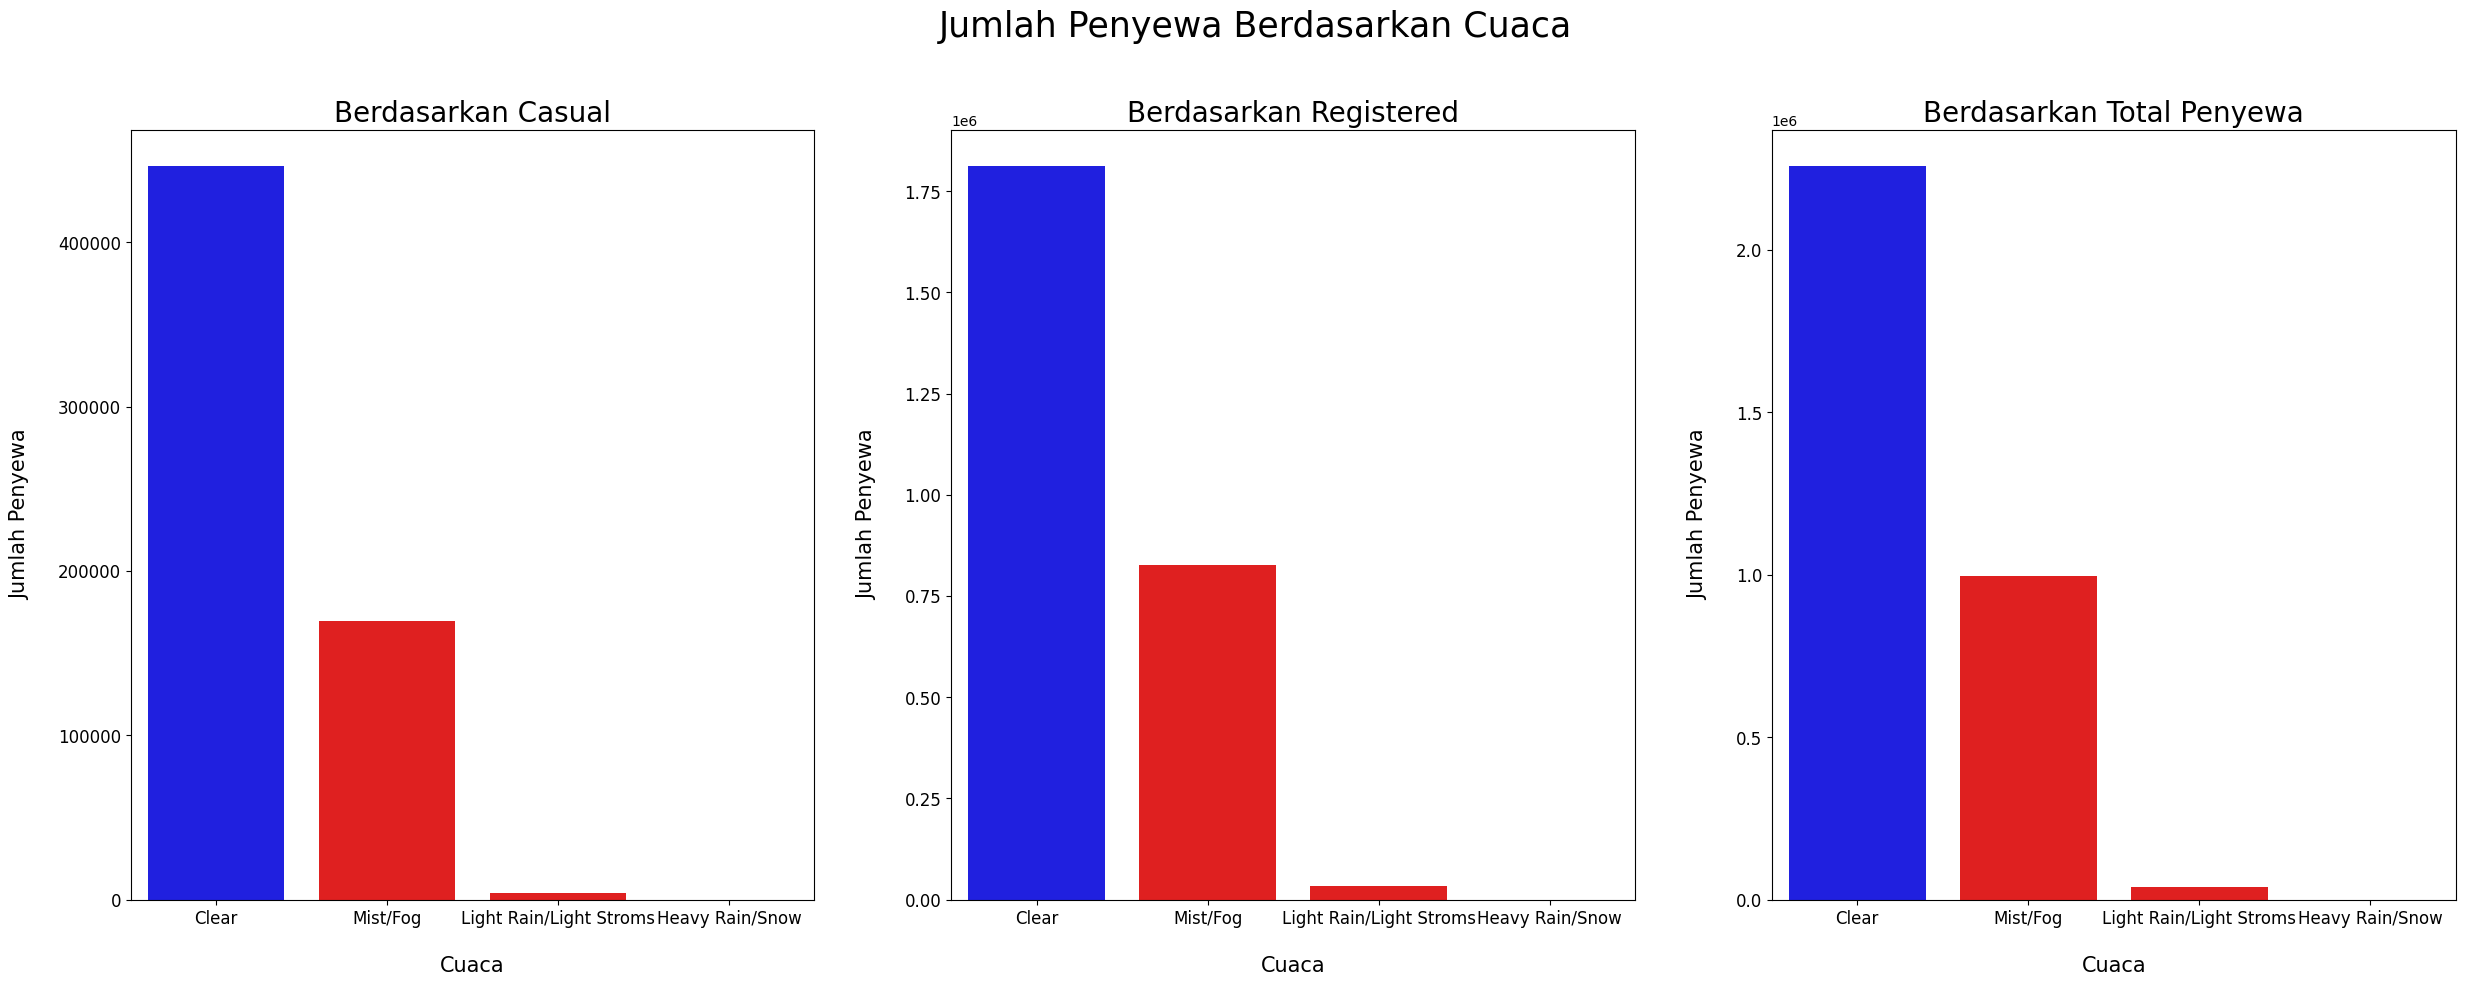

In [12]:
#Menampilkan grafik bar plot berdasarkan cuaca
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 10))

colors = ['blue', 'red', 'red', 'red']

sns.barplot(x=result.index, y=result['casual'], ax=ax[0], palette=colors)
ax[0].set_title('Berdasarkan Casual', fontsize=20)
ax[0].set_xlabel('Cuaca', labelpad=20, fontsize=15)
ax[0].set_ylabel('Jumlah Penyewa', labelpad=20, fontsize=15)
ax[0].tick_params(axis='x', labelsize=12)
ax[0].tick_params(axis='y', labelsize=12)

sns.barplot(x=result.index, y=result['registered'], ax=ax[1], palette=colors)
ax[1].set_title('Berdasarkan Registered', fontsize=20)
ax[1].set_xlabel('Cuaca', labelpad=20, fontsize=15)
ax[1].set_ylabel('Jumlah Penyewa', labelpad=20, fontsize=15)
ax[1].tick_params(axis='x', labelsize=12)
ax[1].tick_params(axis='y', labelsize=12)

sns.barplot(x=result.index, y=result['cnt'], ax=ax[2], palette=colors)
ax[2].set_title('Berdasarkan Total Penyewa', fontsize=20)
ax[2].set_xlabel('Cuaca', labelpad=20, fontsize=15)
ax[2].set_ylabel('Jumlah Penyewa', labelpad=20, fontsize=15)
ax[2].tick_params(axis='x', labelsize=12)
ax[2].tick_params(axis='y', labelsize=12)

plt.suptitle('Jumlah Penyewa Berdasarkan Cuaca',y=1,fontsize=25)
plt.show()

### Pertanyaan 3: Pada musim apa yang memiliki jumlah total(_cnt_) penyewaan tertinggi dan terendah?

Pada musim apa yang memiliki jumlah total(_cnt_) penyewaan tertinggi dan terendah?

<ipython-input-13-628e8cc66025>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season_group', y='casual', data=days_df, ax=ax[0], palette=colors)
<ipython-input-13-628e8cc66025>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season_group', y='registered', data=days_df, ax=ax[1], palette=colors)
<ipython-input-13-628e8cc66025>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season_group', y='cnt', data=days_df, ax=ax[2], palette=colors)


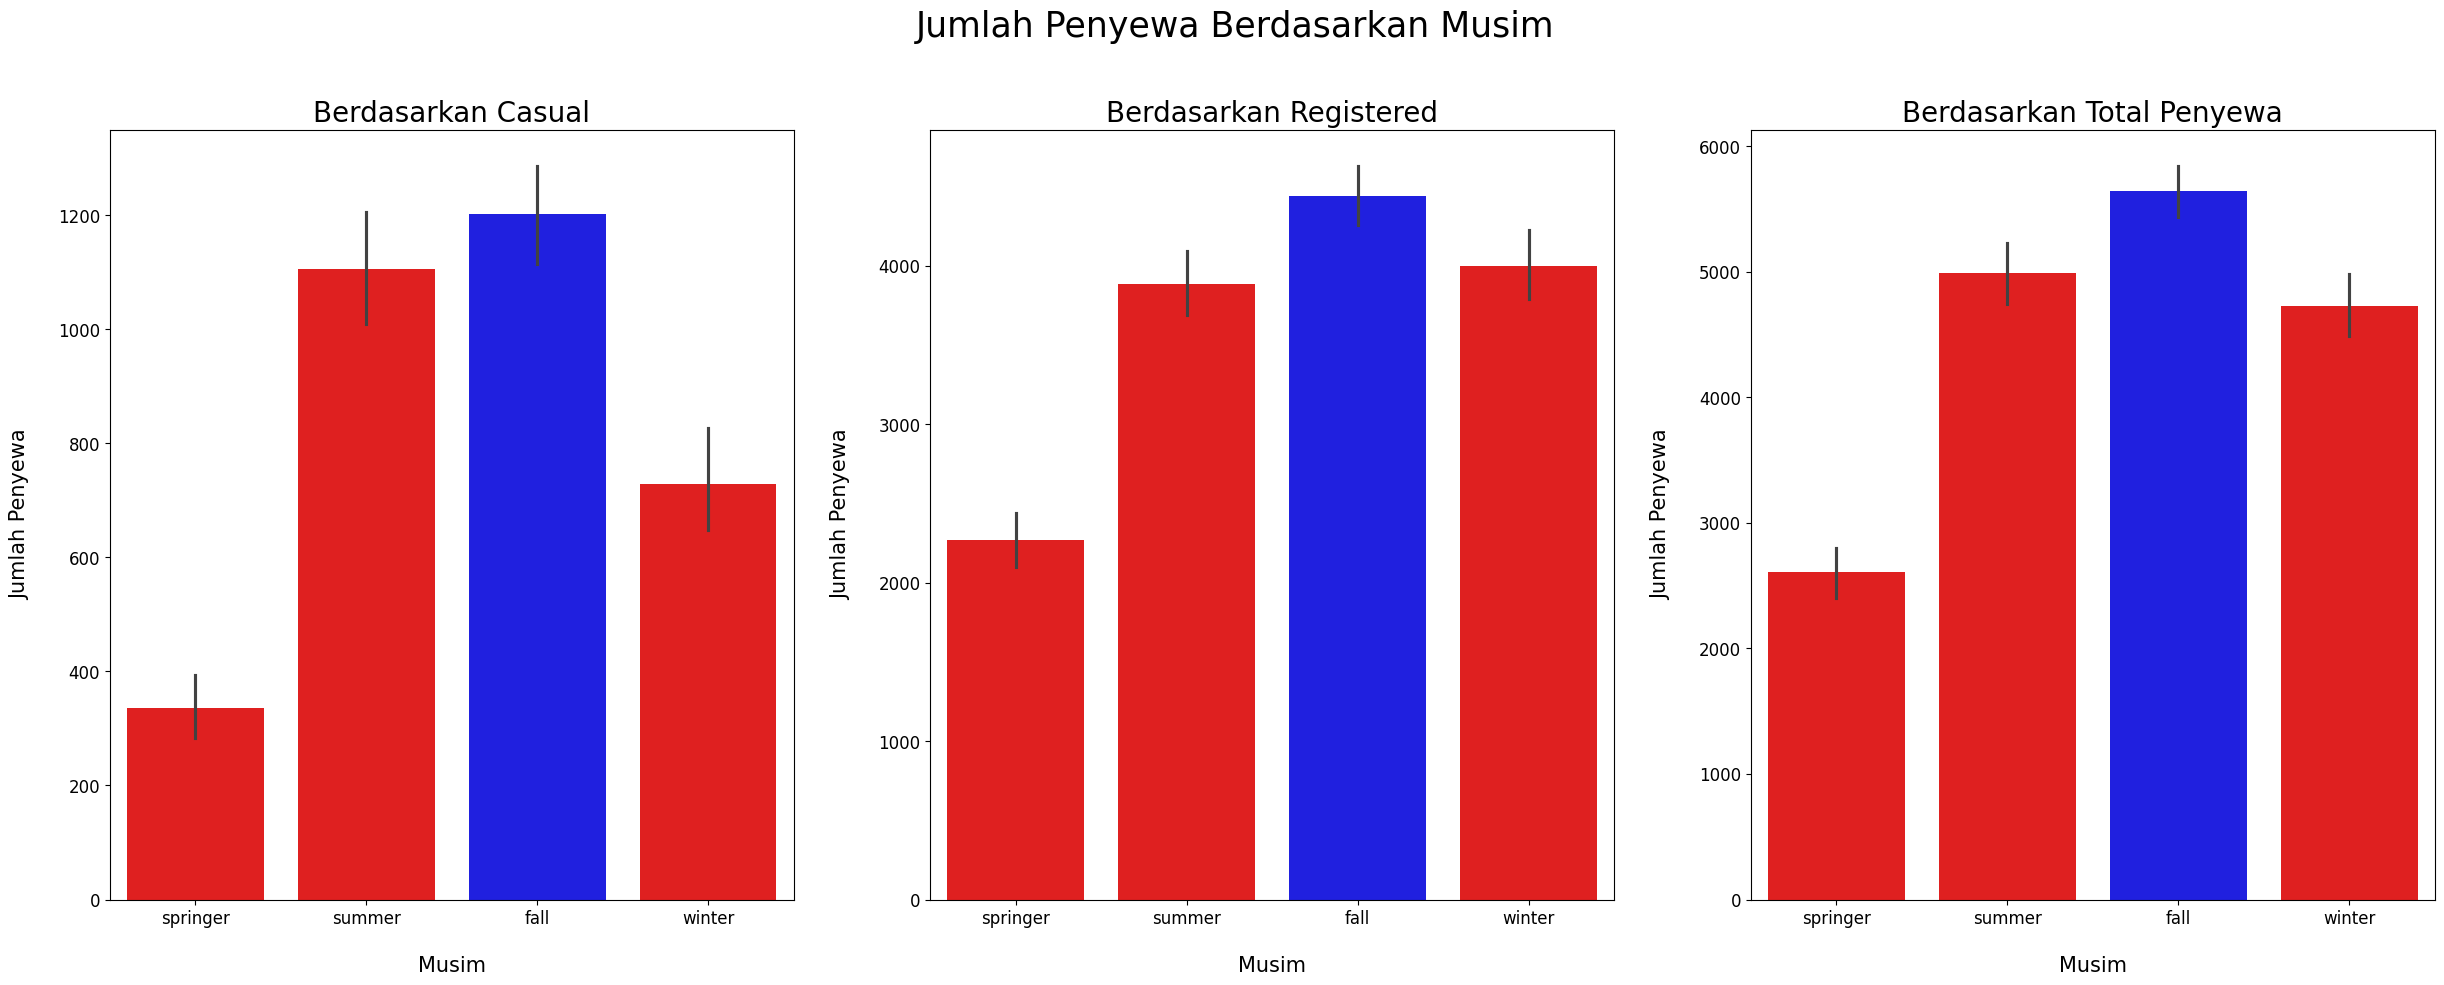

In [13]:
#Grafik berdasarkan musim barplot
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 10))

colors = ['red', 'red', 'blue', 'red']

sns.barplot(x='season_group', y='casual', data=days_df, ax=ax[0], palette=colors)
ax[0].set_title('Berdasarkan Casual', fontsize=20)
ax[0].set_xlabel('Musim', labelpad=20, fontsize=15)
ax[0].set_ylabel('Jumlah Penyewa', labelpad=20, fontsize=15)
ax[0].tick_params(axis='x', labelsize=12)
ax[0].tick_params(axis='y', labelsize=12)

sns.barplot(x='season_group', y='registered', data=days_df, ax=ax[1], palette=colors)
ax[1].set_title('Berdasarkan Registered', fontsize=20)
ax[1].set_xlabel('Musim', labelpad=20, fontsize=15)
ax[1].set_ylabel('Jumlah Penyewa', labelpad=20, fontsize=15)
ax[1].tick_params(axis='x', labelsize=12)
ax[1].tick_params(axis='y', labelsize=12)

sns.barplot(x='season_group', y='cnt', data=days_df, ax=ax[2], palette=colors)
ax[2].set_title('Berdasarkan Total Penyewa', fontsize=20)
ax[2].set_xlabel('Musim', labelpad=20, fontsize=15)
ax[2].set_ylabel('Jumlah Penyewa', labelpad=20, fontsize=15)
ax[2].tick_params(axis='x', labelsize=12)
ax[2].tick_params(axis='y', labelsize=12)

plt.suptitle('Jumlah Penyewa Berdasarkan Musim',y=1,fontsize=25)
plt.show()

**Insight**
* Secara keseluruhan, terlihat tren peningkatan penyewaan sepeda dari awal 2021 hingga pertangahan 2012, setelah itu diikuti oleh penurunan tajam menjelang akhir 2012, pola penyewaan terjadi fluktuasi yang berulang.
* Berdasarkan cuaca, penyewaan sepeda lebih ramai ketika cuaca sedang cerah.
* Berdasarkan musim juga penyewaan sepeda lebih ramai saat tiba waktu musim gugur.

## Analisis Lanjutan

In [14]:
#Membuat manual clustering dengan kolom musim, workingday, weathersit, temp, dan jumlah penyewa
#Membuat cluster manual berdasarkan kriteria diatas dengan if elif else
q1 = days_df['temp'].quantile(0.25)
q3 = days_df['temp'].quantile(0.75)

q11 = days_df['windspeed'].quantile(0.25)
q31 = days_df['windspeed'].quantile(0.75)

def create_cluster(row):
  workingday = row['workingday']
  temp = row['temp']
  windspeed = row['windspeed']

  cluster =' '

  #membuat cluster
  if workingday == 0 and temp < q1 and windspeed < q11:
    return 'cluster 01'
  elif workingday == 0 and temp >= q1 and temp <= q3 and windspeed >= q11 and windspeed <= q31:
    return 'cluster 02'
  elif workingday == 0 and temp > q3 and windspeed > q31:
    return 'cluster 03'
  elif workingday == 1 and temp < q1 and windspeed < q11:
    return 'cluster 04'
  elif workingday == 1 and temp >= q1 and temp <= q3 and windspeed >= q11 and windspeed <= q31:
    return 'cluster 05'
  elif workingday == 1 and temp > q3 and windspeed > q31:
    return 'cluster 06'
  elif workingday == 0 and temp < q1 and windspeed > q31:
    return 'cluster 07'
  elif workingday == 0 and temp > q3 and windspeed < q11:
    return 'cluster 08'
  elif workingday == 1 and temp < q1 and windspeed > q31:
    return 'cluster 09'
  elif workingday == 1 and temp > q3 and windspeed < q11:
    return 'cluster 10'
  elif workingday == 0 and temp >= q1 and temp <= q3 and windspeed < q11:
    return 'cluster 11'
  else:
    return 'cluster 12'

#menampilkan cluster
days_df["cluster"] = days_df.apply(create_cluster, axis=1)
days_df.groupby(by="cluster").agg({
    "cnt": "sum",
    "cluster" : "value_counts"
}).sort_index(ascending=True)

,cnt,cluster
cluster,,
cluster 01,27136,9
cluster 02,252950,51
cluster 03,45311,9
cluster 04,90121,32
cluster 05,528286,108
cluster 06,90234,16
cluster 07,42573,21
cluster 08,76078,14
cluster 09,66115,28


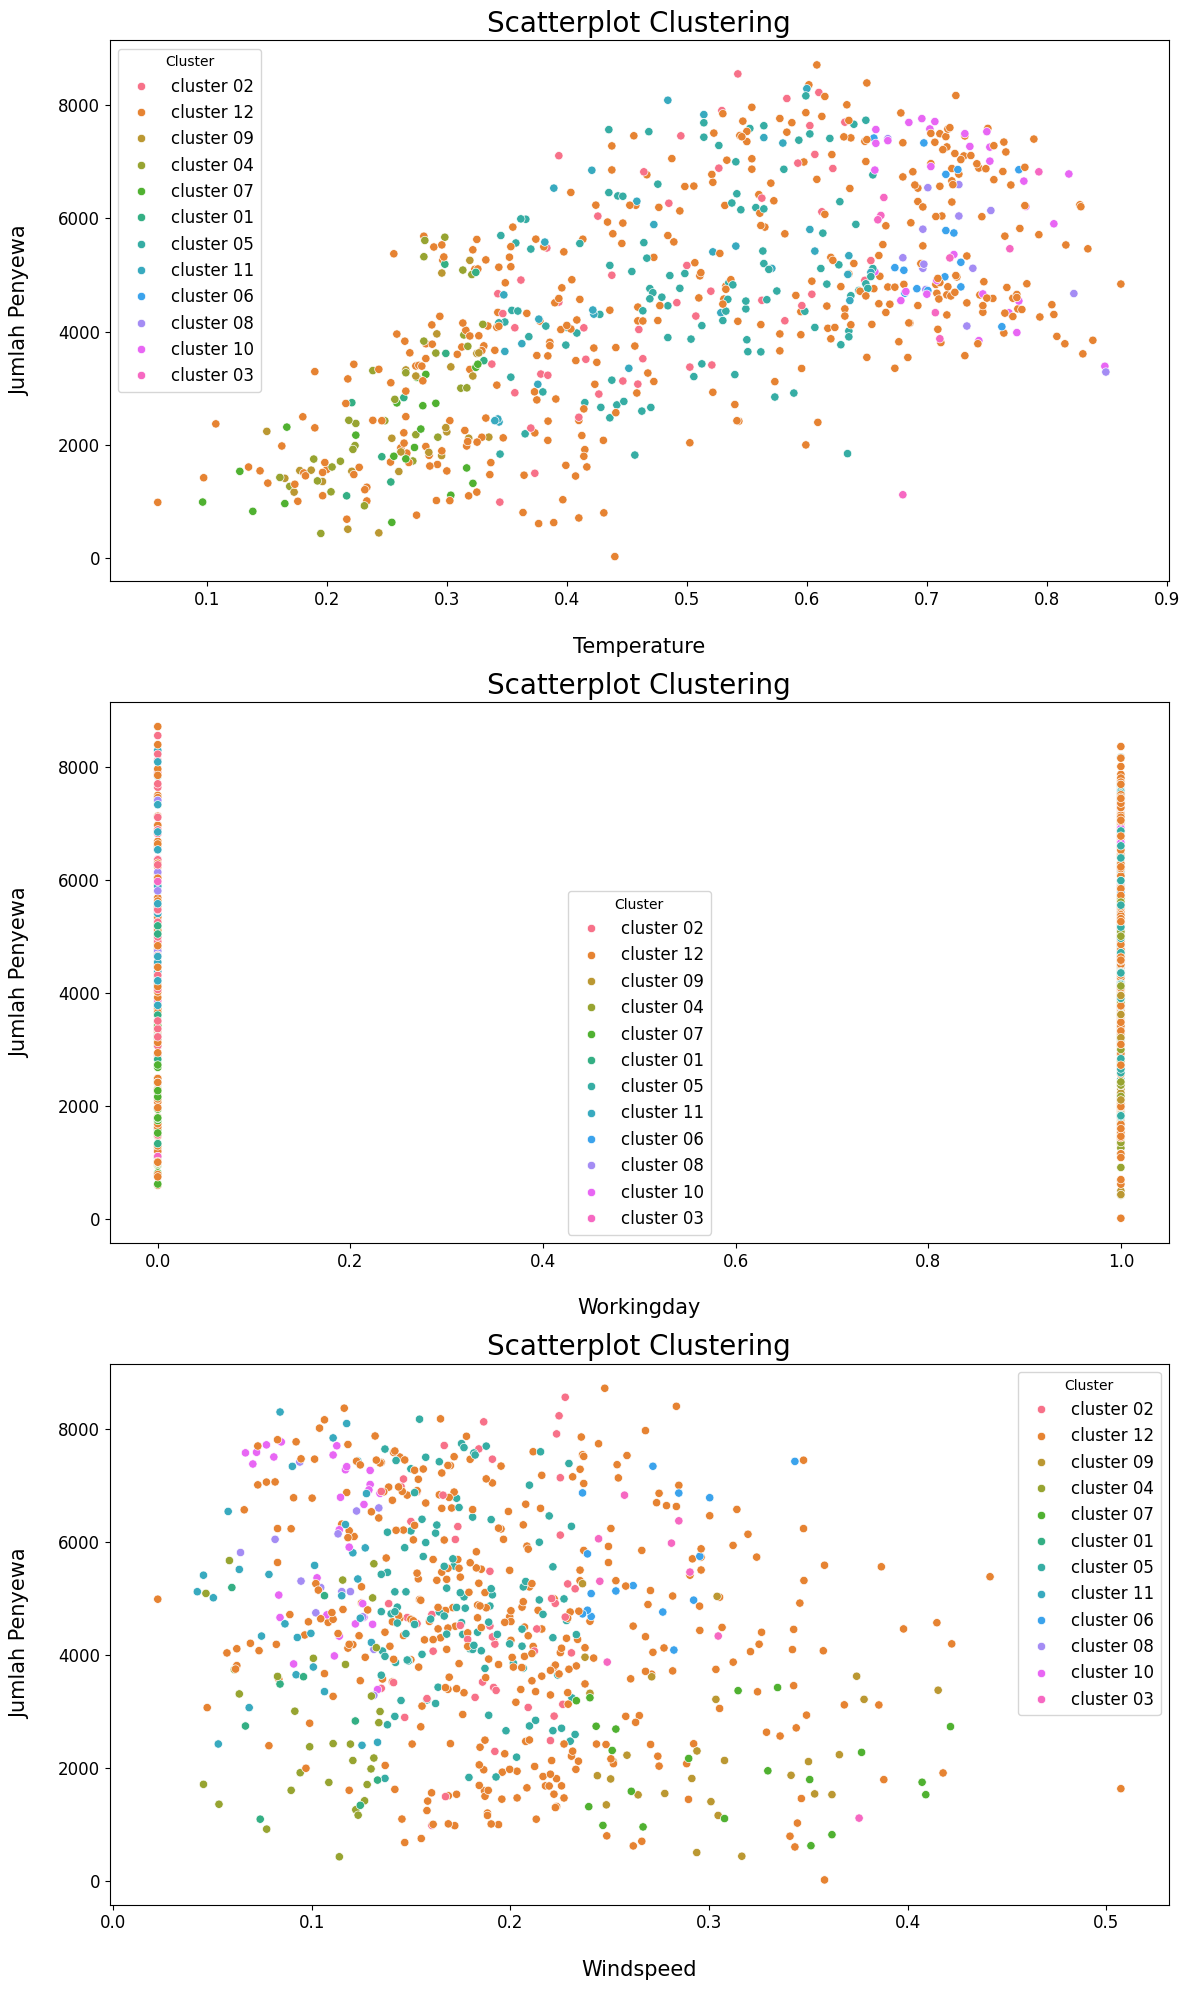

In [15]:
#Membuat scatterplot untuk visualisasi clustering
fig, ax = plt.subplots(nrows=3, figsize=(12, 20))
sns.scatterplot(x='temp', y='cnt', hue='cluster', data=days_df, ax=ax[0])
ax[0].set_title('Scatterplot Clustering', fontsize=20)
ax[0].set_xlabel('Temperature', labelpad=20, fontsize=15)
ax[0].set_ylabel('Jumlah Penyewa', labelpad=20, fontsize=15)
ax[0].tick_params(axis='x', labelsize=12)
ax[0].tick_params(axis='y', labelsize=12)
ax[0].legend(title='Cluster', fontsize=12)
plt.tight_layout()

sns.scatterplot(x='workingday', y='cnt', hue='cluster', data=days_df, ax=ax[1])
ax[1].set_title('Scatterplot Clustering', fontsize=20)
ax[1].set_xlabel('Workingday', labelpad=20, fontsize=15)
ax[1].set_ylabel('Jumlah Penyewa', labelpad=20, fontsize=15)
ax[1].tick_params(axis='x', labelsize=12)
ax[1].tick_params(axis='y', labelsize=12)
ax[1].legend(title='Cluster', fontsize=12)
plt.tight_layout()

sns.scatterplot(x='windspeed', y='cnt', hue='cluster', data=days_df, ax=ax[2])
ax[2].set_title('Scatterplot Clustering', fontsize=20)
ax[2].set_xlabel('Windspeed', labelpad=20, fontsize=15)
ax[2].set_ylabel('Jumlah Penyewa', labelpad=20, fontsize=15)
ax[2].tick_params(axis='x', labelsize=12)
ax[2].tick_params(axis='y', labelsize=12)
ax[2].legend(title='Cluster', fontsize=12)
plt.tight_layout()

plt.show()

## Conclution


Berikut beberapa pertanyaan bisnis:
1. Bagaimana tren total penyewaan sepeda dari waktu ke waktu (dalam satuan mingguan)?
<br>Grafik menunjukkan adanya tren pertumbuhan yang signifikan dalam penyewaan sepeda dari awal tahun 2011 hingga pertengahan 2012. Pada akhir tahun 2012 juga mengalami penurunan yang sangat tajam menunjukkan adanya faktor eksternal yang berpengaruh secara signifikan. Informasi ini dapat digunakan untuk perencanaan operasional dan strategi pemasaran.

<br>

2. Bagaimana jumlah penyewa (_casual_, _registered_, dan _cnt_ pada setiap kondisicuaca yang ada?<br>
Plot "Jumlah Penyewa Berdasarkan Cuaca" dengan jelas menunjukkan bahwa kondisi cuaca memiliki pengaruh yang signifikan terhadap jumlah penyewa, baik penyewa kasual, terdaftar, maupun total. Secara umum, cuaca cerah (Clear) secara konsisten menarik jumlah penyewa yang jauh lebih besar dibandingkan kondisi cuaca lainnya. Pada penyewa kasual, jumlah tertinggi tercatat saat cuaca cerah, diikuti penurunan drastis saat cuaca berkabut/kabut (Mist/Fog), dan penurunan lebih lanjut saat hujan ringan/badai ringan (Light Rain/Light Storms), dengan hampir tidak ada penyewa saat hujan deras/salju (Heavy Rain/Snow). Pola serupa terlihat pada penyewa terdaftar, mengkonfirmasi preferensi yang kuat untuk cuaca cerah. Plot total penyewa mencerminkan tren gabungan, menegaskan dominasi cuaca cerah dalam menarik penyewa dan penurunan tajam saat kondisi cuaca buruk. Perbedaan mencolok antara jumlah penyewa saat cuaca cerah dan kondisi cuaca lainnya menyoroti sensitivitas penyewa terhadap cuaca. Data ini mengimplikasikan pentingnya mempertimbangkan kondisi cuaca dalam perencanaan bisnis yang bergantung pada penyewa, serta potensi untuk melakukan promosi atau penawaran khusus saat cuaca buruk untuk menarik penyewa.

<br>

3. Pada musim apa yang memiliki jumlah total(_cnt_) penyewaan tertinggi dan terendah? <br>
Plot "Jumlah Penyewa Berdasarkan Musim" menunjukkan bahwa penyewaan tertinggi adalah pada saat musim gugur baik dari segi penyewa kasual, terdaftar, maupun total keduanya.

<br>

4. Bagaimana bentuk klasterisasi yang dihasilkan ketika data dikelompokkan berdasarkan workingday, temp, dan windspeed? Bagaimana total penyewa(cnt) setiap klasternya?<br>
Berdasarkan klasterisasi yang terdapat 12 klaster, didapatkan <br>
cluster 01  27136<br>
cluster 02	252950<br>
cluster 03	45311<br>
cluster 04	90121<br>
cluster 05	528286<br>
cluster 06	90234<br>
cluster 07	42573<br>
cluster 08	76078<br>
cluster 09	66115<br>
cluster 10	182935<br>
cluster 11	160387<br>
cluster 12	1730553<br>
